# Adaptive-Runge–Kutta

Compile, run, and plot the result from RKF.cpp

In [1]:
import subprocess
import sys

import os

import time

In [2]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=10
plt.rcParams['mathtext.fontset']='stixsans'

In [8]:
os.chdir('..')
os.system(r'make')
os.chdir('0-test')

In [9]:
time0=time.time()

output=subprocess.check_output(["../RKF"]).decode(sys.stdout.encoding).split("\n")

print("time: {:10} s".format( time.time()-time0)  )


N=int(output[0])

solution=np.array([ i.split(' ')   for i in output[1:N+1] ] ,np.float64)

Deltas=np.array(output[N+1:-1],np.float64)

time: 0.013210773468017578 s


In [10]:
t=solution[:,0]
y1=solution[:,1]
y2=solution[:,2]
y3=solution[:,3]

err1=solution[:,4]
err2=solution[:,5]
err3=solution[:,6]


hist=solution[:,7]

<IPython.core.display.Javascript object>


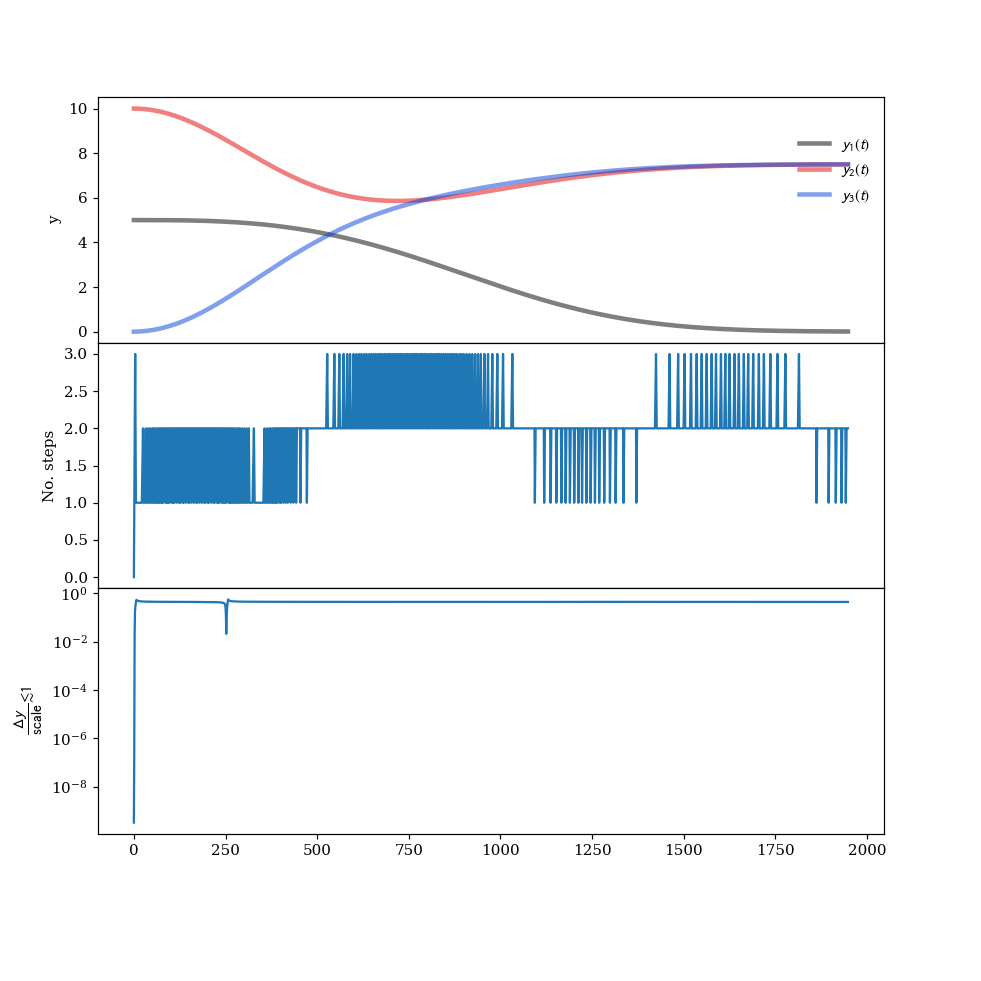

In [11]:
fig=plt.figure(figsize=(9,9))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(311)

sub.plot(t,y1,c=_c[0],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{1}(t)$')
sub.plot(t,y2,c=_c[1],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{2}(t)$')
sub.plot(t,y3,c=_c[2],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{3}(t)$')
sub.legend(framealpha=0,ncol=1,loc='upper right',bbox_to_anchor=(1,.9))

sub.set_ylabel('y')   
    


sub = fig.add_subplot(312)    
sub.plot(t,hist)
sub.set_ylabel('No. steps')
sub.set_xlabel('t')  

sub = fig.add_subplot(313)    
sub.plot(Deltas)
sub.set_yscale('log')
sub.set_ylabel(r' $\dfrac{\Delta y}{\rm scale} \lesssim 1$ ')
sub.set_xlabel('')  



plt.show()